In [1]:
from lib import utils, data_inspection_utils

import numpy as np
import pandas as pd
import urllib.request
import os

np.random.seed(777)

# Index Data Download Links



- [World Small Cap - IUSN (PROBLEMATIC DATA)](https://finance.yahoo.com/quote/IUSN.DE/history?period1=1532304000&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

Download manually from: https://www.investing.com/etfs/ishares-msci-world-small-cap-acc-historical-data

- [Emerging Markets - EMIM.AS](https://finance.yahoo.com/quote/EMIM.AS/history?period1=1401667200&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [Developed Markets - IWDA.AS](https://finance.yahoo.com/quote/IWDA.AS/history?period1=1253836800&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [World Value - IWVL.MI](https://finance.yahoo.com/quote/IWVL.MI/history?period1=1424390400&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [REIT - TRET.AS (PROBLEMATIC DATA)](https://finance.yahoo.com/quote/TRET.AS/history?period1=1306972800&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

Download manually from: https://www.investing.com/etfs/think-global-real-estate-tracker-historical-data

- [EU Bond ETF - EUNA.DE](https://finance.yahoo.com/quote/EUNA.DE/history?period1=1258070400&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

- [Global bond ETF - IEAG.AS](https://finance.yahoo.com/quote/IEAG.AS/history?period1=1242259200&period2=1602979200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

# Download the data

In [134]:
#### UPDATE THE DATE EVERY TIME YOU RUN IT######
date = "/12_2020/"

data_path = f"{os.getcwd()}/Historical_data"

In [133]:
"""
Run this to download new data and store locally.
"""

if not os.path.exists(data_path + date):
    os.makedirs(data_path + date)

    # Add IUSN manually
# IUSN_URL = 'https://query1.finance.yahoo.com/v7/finance/download/IUSN.DE?period1=1532304000&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true'

EMIM_URL = "https://query1.finance.yahoo.com/v7/finance/download/EMIM.AS?period1=1401667200&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true"
IWDA_URL = "https://query1.finance.yahoo.com/v7/finance/download/IWDA.AS?period1=1253836800&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true"
IWVL_URL = "https://query1.finance.yahoo.com/v7/finance/download/IWVL.MI?period1=1424390400&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true"
# Add TRET manually
# TRET_URL ='https://query1.finance.yahoo.com/v7/finance/download/TRET.AS?period1=1306972800&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true'
EUNA_URL = "https://query1.finance.yahoo.com/v7/finance/download/AGGH.SW?period1=1258070400&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true"
IEAG_URL = "https://query1.finance.yahoo.com/v7/finance/download/IEAG.AS?period1=1242259200&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true"

# urllib.request.urlretrieve(TRET_URL, data_path+date+'IUSN.csv');
urllib.request.urlretrieve(IWDA_URL, data_path + date + "IWDA.csv")
urllib.request.urlretrieve(EMIM_URL, data_path + date + "EMIM.csv")
urllib.request.urlretrieve(IWVL_URL, data_path + date + "IWVL.csv")
# urllib.request.urlretrieve(TRET_URL, data_path+date+'TRET.csv');
urllib.request.urlretrieve(EUNA_URL, data_path + date + "EUNA.csv")
urllib.request.urlretrieve(IEAG_URL, data_path + date + "IEAG.csv");

# Construct a portfolio

# Load fixed dataframes
EMIM = pd.read_csv(f'{data_path}/manually_downloaded/EMIM.AS.csv')
EUNA = pd.read_csv(f'{data_path}/manually_downloaded/EUNA.csv')
IEAG = pd.read_csv(f'{data_path}/manually_downloaded/IEAG.AS.csv')
IWDA = pd.read_csv(f'{data_path}/manually_downloaded/IWDA.AS.csv')
IUSN = pd.read_csv(f'{data_path}/manually_downloaded/IUSN.csv')
IWVL = pd.read_csv(f'{data_path}/manually_downloaded/IWVL.csv')
TRET = pd.read_csv(f'{data_path}/manually_downloaded/TRET.csv')

### *Note:* Before running, manually download IUSN and TRET and store in the same folder with the rest:

- [IUSN - Download Here](https://www.investing.com/etfs/ishares-msci-world-small-cap-acc-historical-data)
- [TRET - Download Here](https://www.investing.com/etfs/think-global-real-estate-tracker-historical-data)

In [138]:
EMIM = pd.read_csv(f"{data_path + date}/EMIM.csv")
EUNA = pd.read_csv(f"{data_path + date}/EUNA.csv")
IEAG = pd.read_csv(f"{data_path + date}/IEAG.csv")
IWDA = pd.read_csv(f"{data_path + date}/IWDA.csv")
IUSN = pd.read_csv(f"{data_path + date}/IUSN.csv")
IWVL = pd.read_csv(f"{data_path + date}/IWVL.csv")
TRET = pd.read_csv(f"{data_path + date}/TRET.csv")

In [139]:
# Construct portfolio

portfolio = [IWDA, EMIM, IWVL, IUSN, TRET, EUNA, IEAG]
names = ["IWDA", "EMIM", "IWVL", "IUSN", "TRET", "EUNA", "IEAG"]
description = [
    "Developed Markets",
    "Emerging Markets",
    "World Value",
    "World Small Cap",
    "REIT",
    "EU bond ETF",
    "Global bond ETF",
]
weights = [0.36, 0.12, 0.12, 0.12, 0.08, 0.1, 0.1]

# Add absolute and percentage change, and set Date to Datetime
portfolio = utils.apply_perc_change(portfolio)

# Construt dictionary of the portfolio
portfolio_dict = utils.construct_portfolio_dictionary(portfolio, names, weights, description)

# Inspect the data

############### Printing Number of Rows per index...###############
Number of days in "IWDA" is 2781
Number of days in "EMIM" is 1601
Number of days in "IWVL" is 1215
Number of days in "IUSN" is 665
Number of days in "TRET" is 2470
Number of days in "EUNA" is 606
Number of days in "IEAG" is 2880


############### Printing Data Ranges per index...###############
Date range for "IWDA" is from 2009-10-13 00:00:00 to 2020-10-16 00:00:00
Date range for "EMIM" is from 2014-06-02 00:00:00 to 2020-10-16 00:00:00
Date range for "IWVL" is from 2015-02-20 00:00:00 to 2020-10-16 00:00:00
Date range for "IUSN" is from 2018-04-26 00:00:00 to 2020-12-11 00:00:00
Date range for "TRET" is from 2011-04-15 00:00:00 to 2020-12-11 00:00:00
Date range for "EUNA" is from 2018-04-03 00:00:00 to 2020-10-16 00:00:00
Date range for "IEAG" is from 2009-05-14 00:00:00 to 2020-10-16 00:00:00




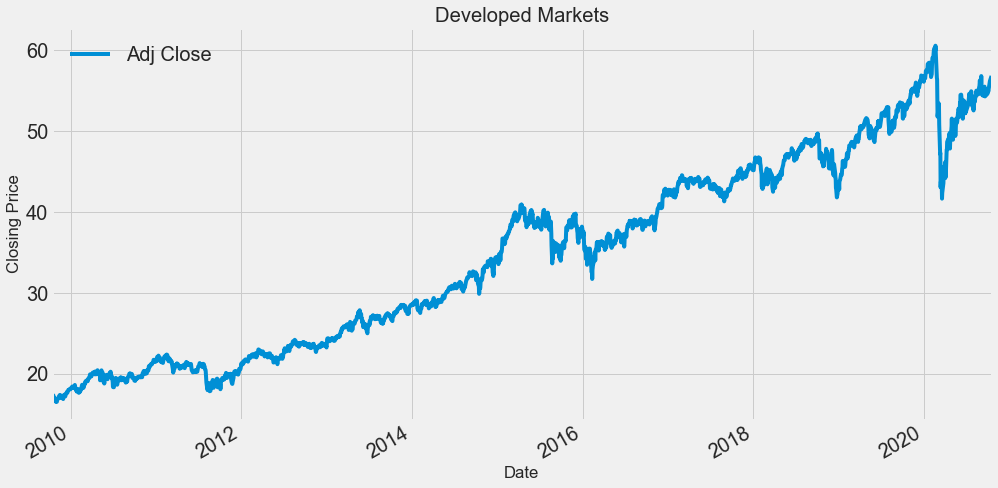

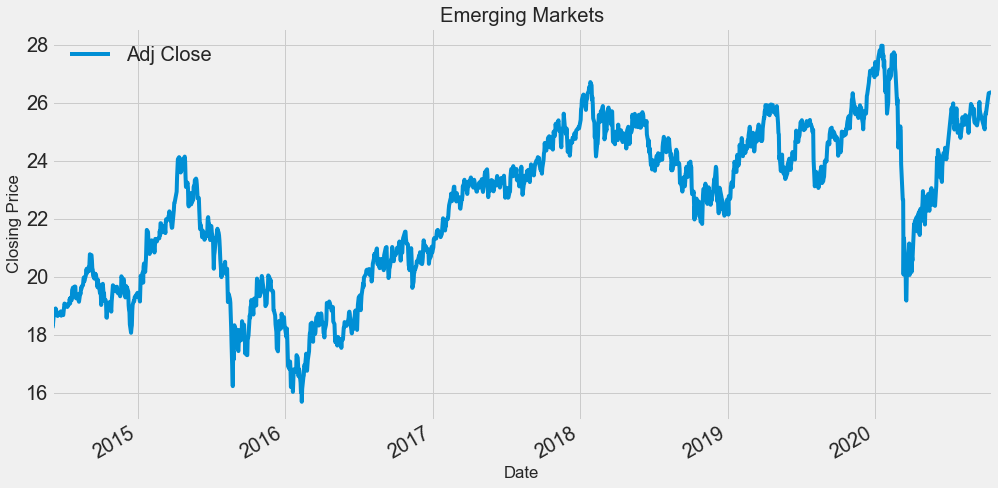

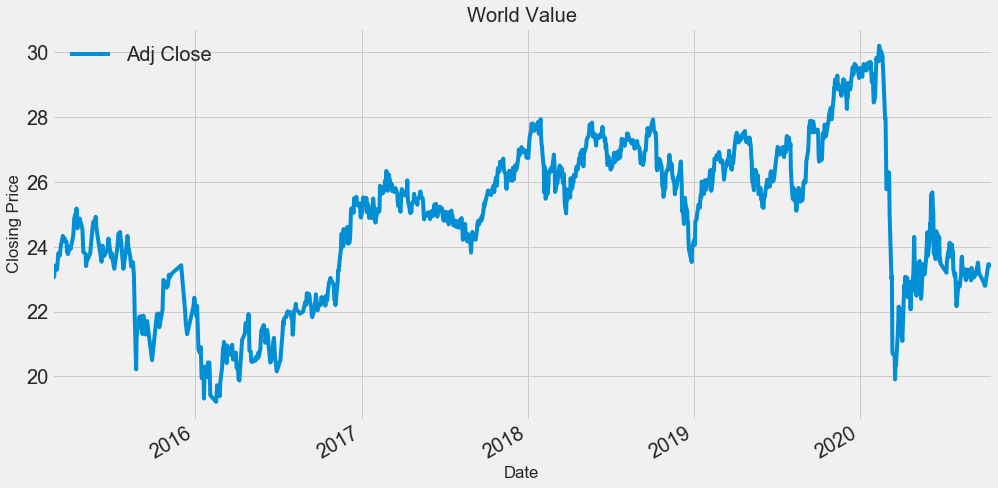

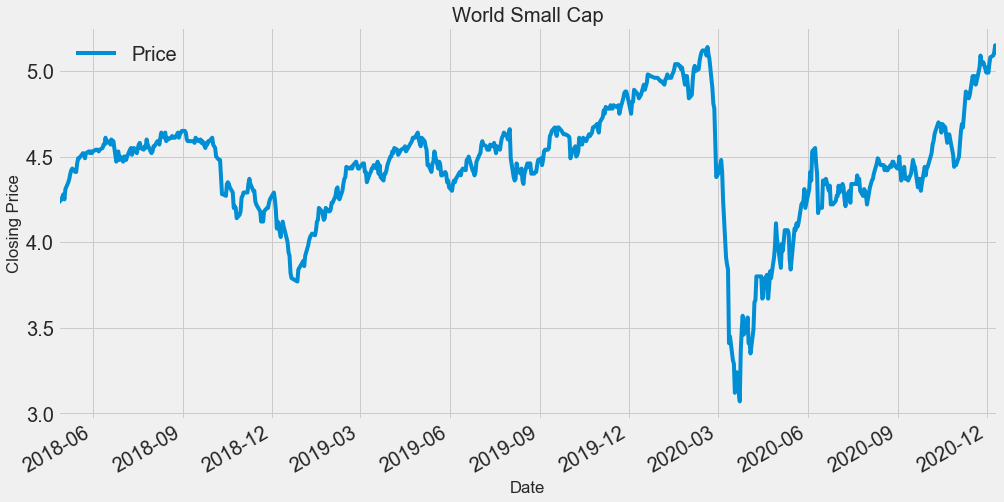

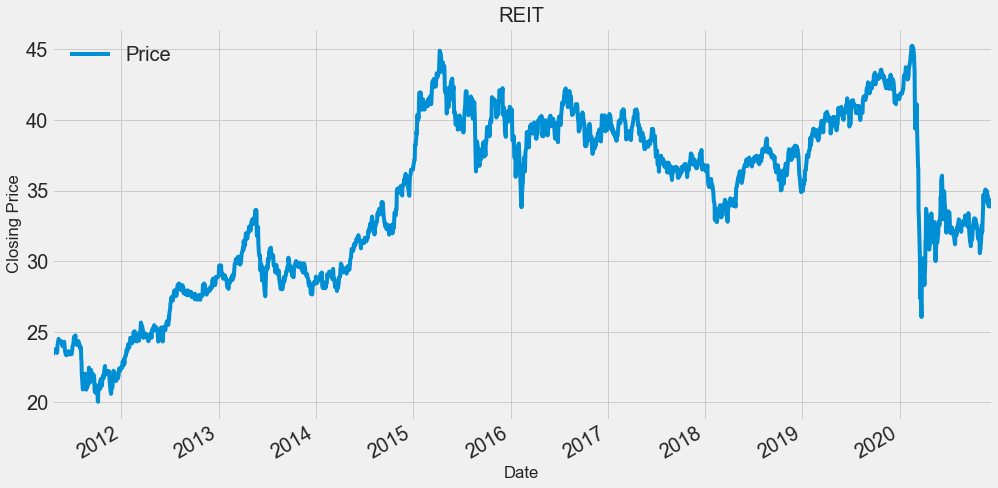

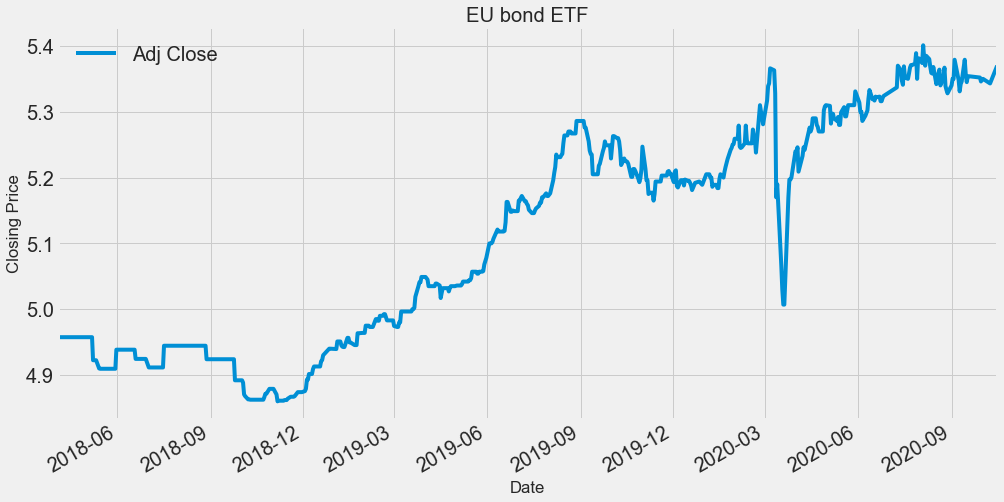

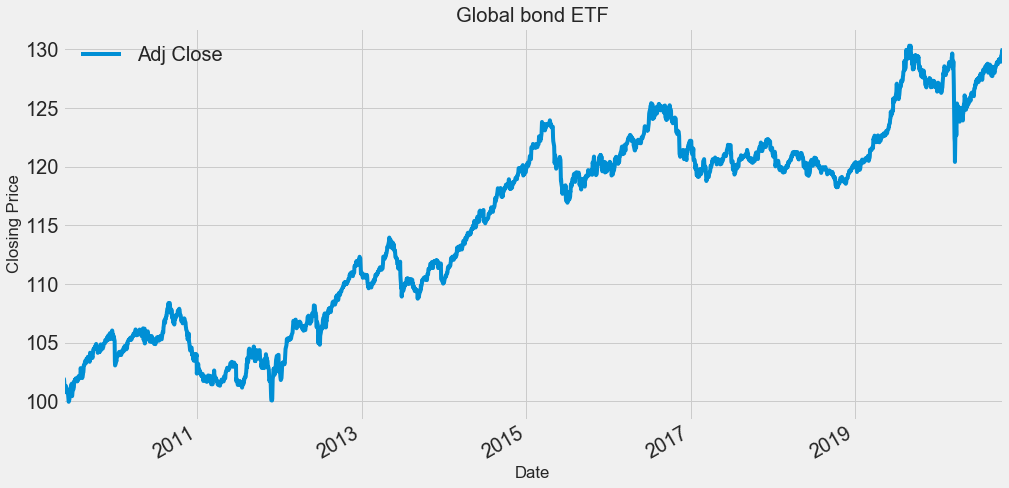

In [137]:
# DOWNLOADED
data_inspection_utils.inspect_data(portfolio_dict=portfolio_dict)

## Compute risk and return of the portfolio

In [109]:
data_inspection_utils.print_risk_and_return_portfolio(portfolio_dict)

The annualized return of the portfolio is 5.81% and the risk is 12.19%


The portfolio minimum date is 2018-04-26 and maximum date is 2020-10-16


# Correlation and Covariance Matrix

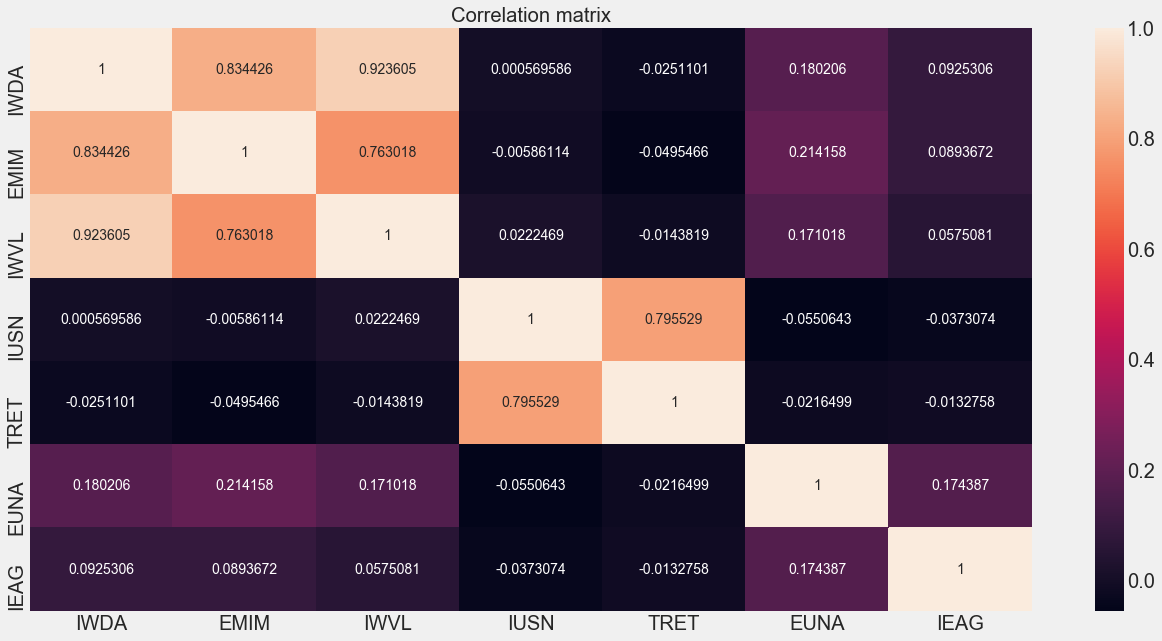

In [110]:
data_inspection_utils.plot_correlation_matrix(portfolio_dict["frames"], portfolio_dict["names"])

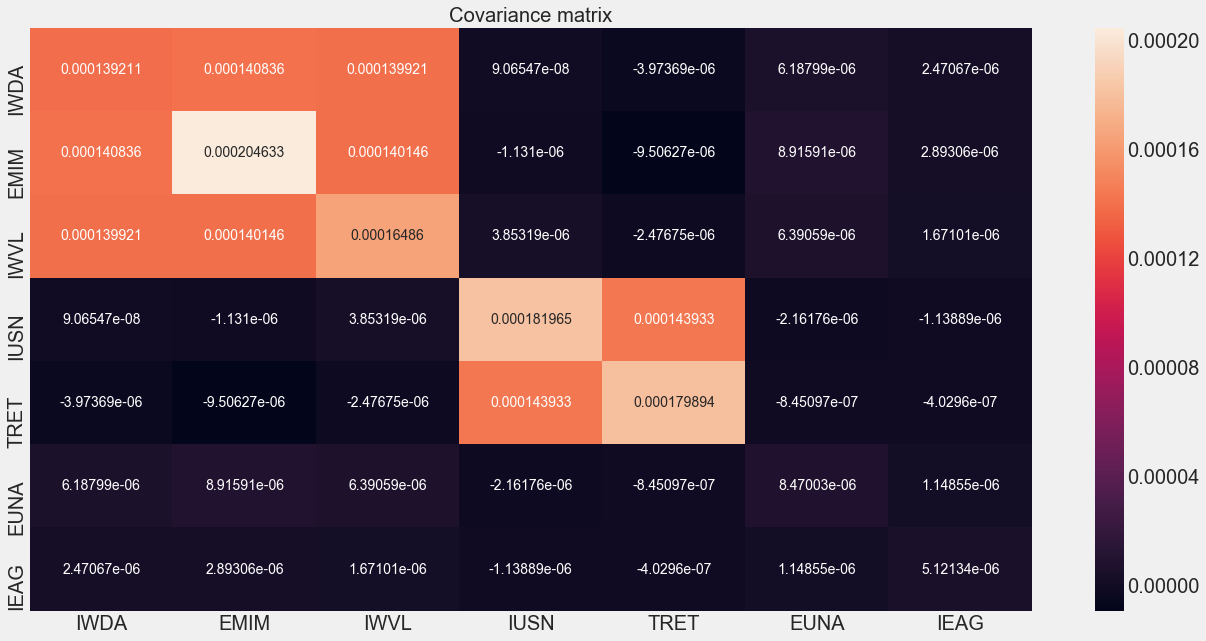

In [111]:
data_inspection_utils.plot_covariance_matrix(portfolio_dict["frames"], portfolio_dict["names"])